In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn

In [16]:
df_in = pd.read_csv('sensitivity_samples/sobol_params.csv')
X = df_in.to_numpy()

In [17]:
df_out = pd.read_csv('sensitivity_samples/sobol_output.csv')
Y = df_out.to_numpy()

In [18]:
seed = 1234

In [19]:
# Define parameters of interest
param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega', 'theta_0']
param_bounds = [[0.5,3], [-0.9, -0.4], [-0.39, -0.2], [0.25, 0.75], [0.5, 1.5], [0.5, 1.5]]
problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
}

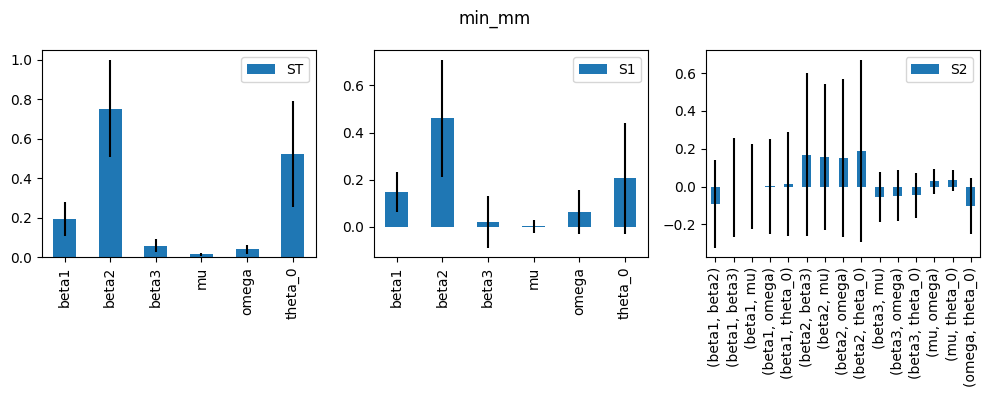

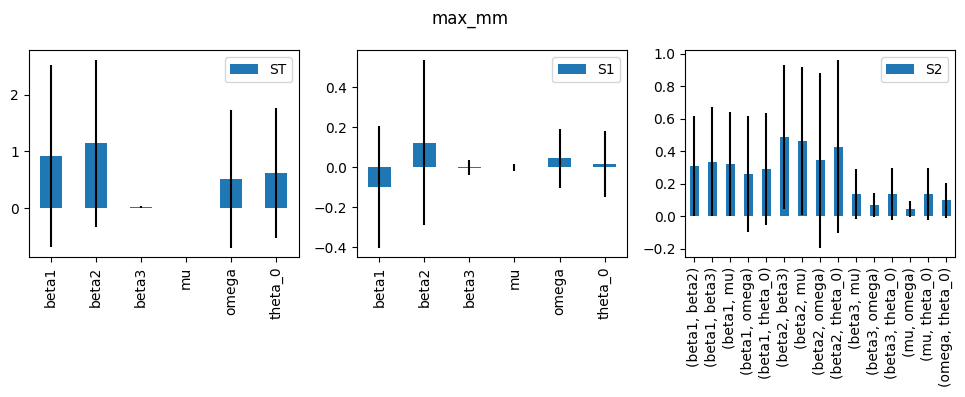

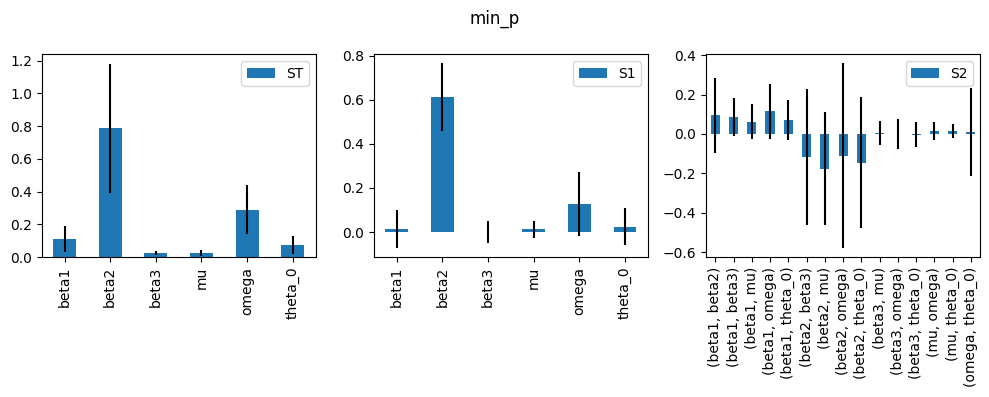

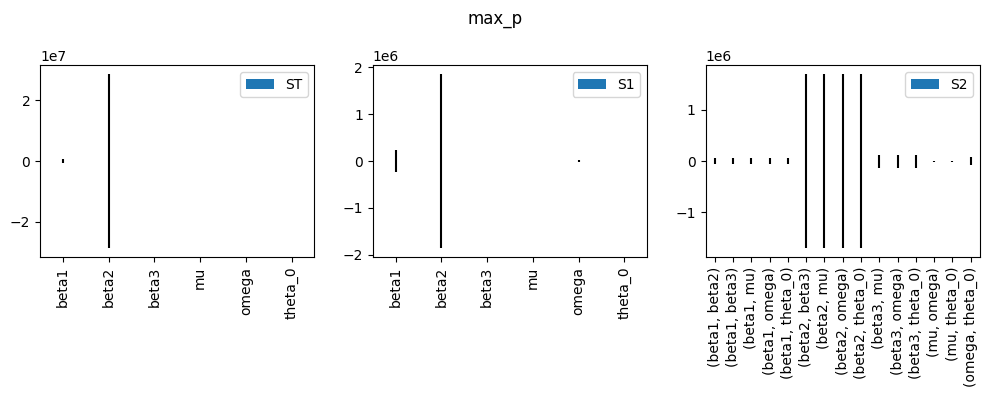

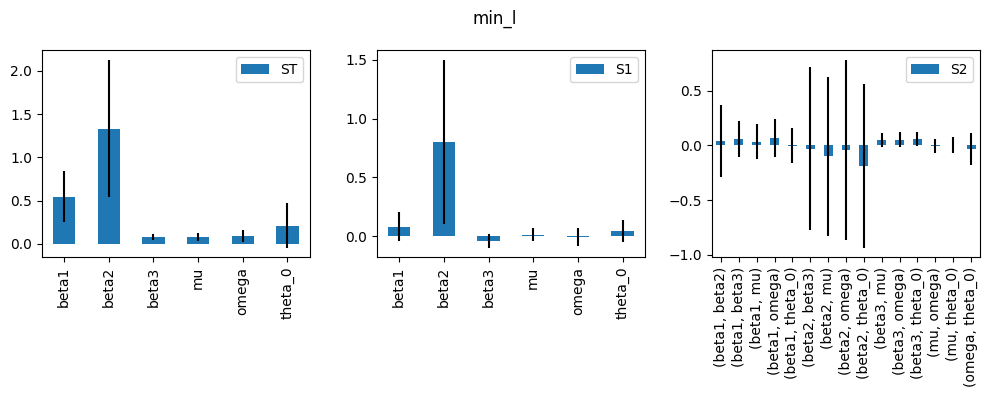

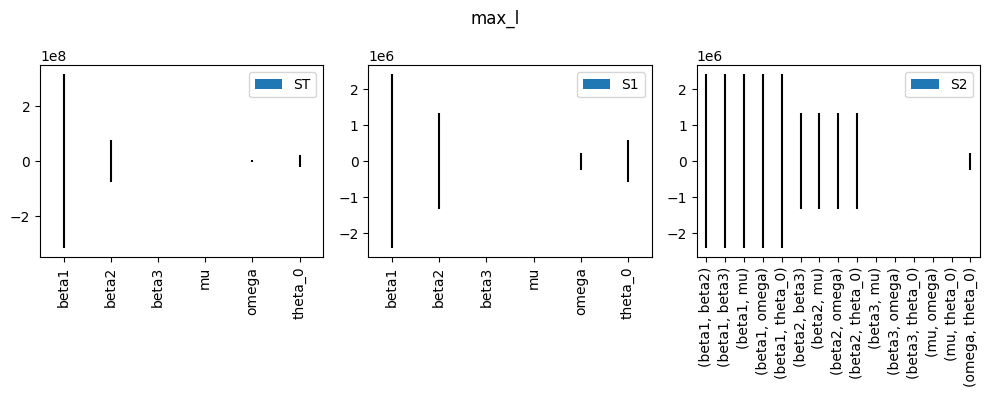

In [22]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()

          minimum      mean    median   maximum        CV
beta1    0.092462  0.178337  0.170373  0.316020  0.370619
beta2    0.210422  0.376734  0.374528  0.644717  0.358724
beta3    0.044815  0.122619  0.106456  0.218006  0.438690
mu       0.082589  0.129484  0.109933  0.238467  0.401608
omega    0.092376  0.148460  0.143329  0.225361  0.287442
theta_0  0.123025  0.233757  0.248955  0.361235  0.363070


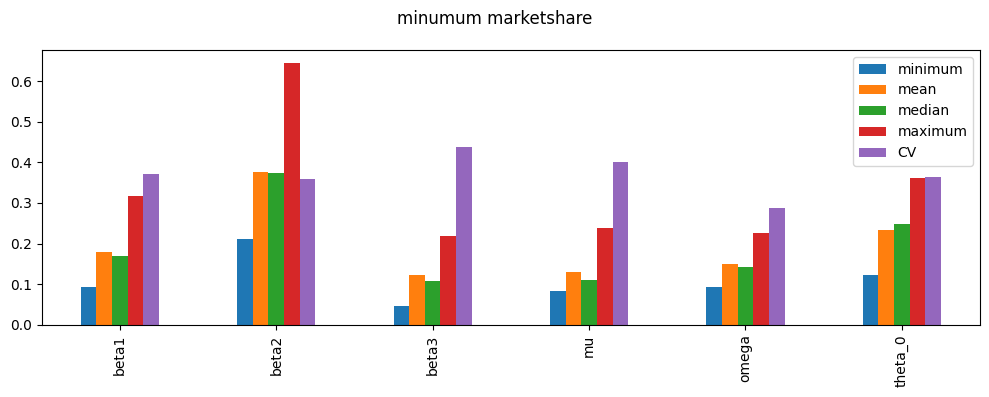

          minimum      mean    median   maximum        CV
beta1    0.073146  0.179124  0.171617  0.274468  0.343118
beta2    0.210193  0.416710  0.417539  0.725446  0.358840
beta3    0.057950  0.111089  0.100232  0.168899  0.303176
mu       0.051511  0.128480  0.106413  0.259301  0.452518
omega    0.094122  0.148646  0.149210  0.209821  0.241215
theta_0  0.099588  0.208102  0.228766  0.307864  0.371852


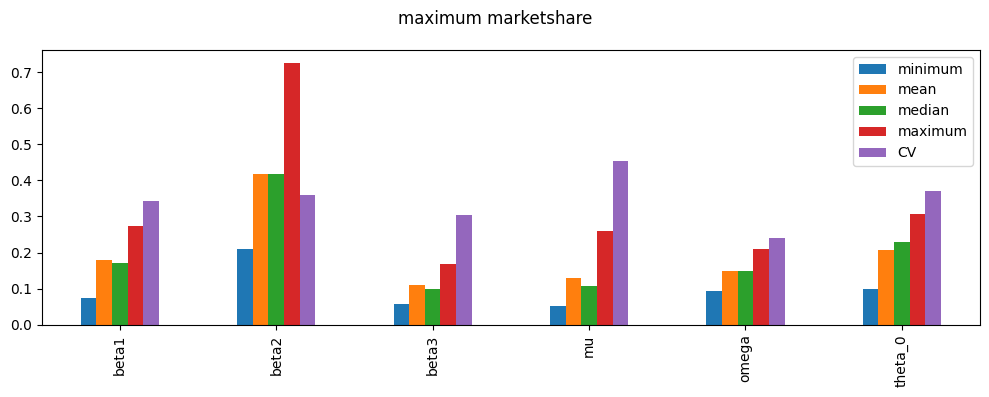

In [21]:
for i, name in zip(range(2), ['minumum', 'maximum']):

    Si_pawn = pawn.analyze(problem, X, Y[:,i], print_to_console=True)
    
    axes = Si_pawn.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name} marketshare')
    plt.tight_layout()
    plt.show()